# Automatically Wrap Graph Labels in Matplotlib and Seaborn

If you've used matplotlib and seaborn to create data visualizations enough, then you've probably run into the issues of overlapping text labels on the x-axis. Let's take a look at an example that uses listings from Airbnb.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['neighborhood', 'accommodates', 'price']
airbnb = pd.read_csv('data/airbnb.csv', usecols=cols)
airbnb.head()

,neighborhood,accommodates,price
0,Historic Anacostia,1,55
1,Edgewood,2,71
2,Eastland Gardens,4,54
3,Edgewood,1,99
4,Kalorama Heights,3,99


After setting the theme, we create a bar plot of the mean price for the top 10 most frequent neighborhoods split by the number of people the listing accommodates.

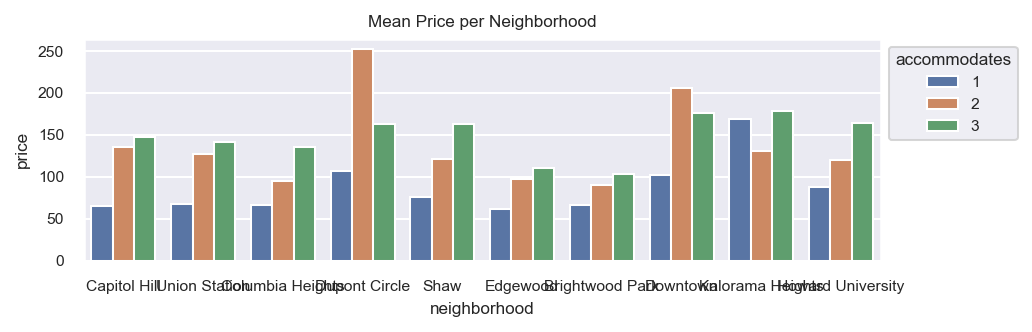

In [2]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147}, font_scale=0.7)
fig, ax = plt.subplots(figsize=(7, 2))
top10 = airbnb['neighborhood'].value_counts().index[:10]
ax.set_title('Mean Price per Neighborhood')
sns.barplot(x='neighborhood', y='price', data=airbnb, ax=ax, 
            order=top10, ci=None, 
            hue='accommodates', hue_order=[1, 2, 3])
ax.legend(bbox_to_anchor=(1, 1), title='accommodates');

### Overlapping labels

As you can see, most of the neighborhood names overlap one another making for an ugly graph. One solution is to rotate the labels 90 degrees.

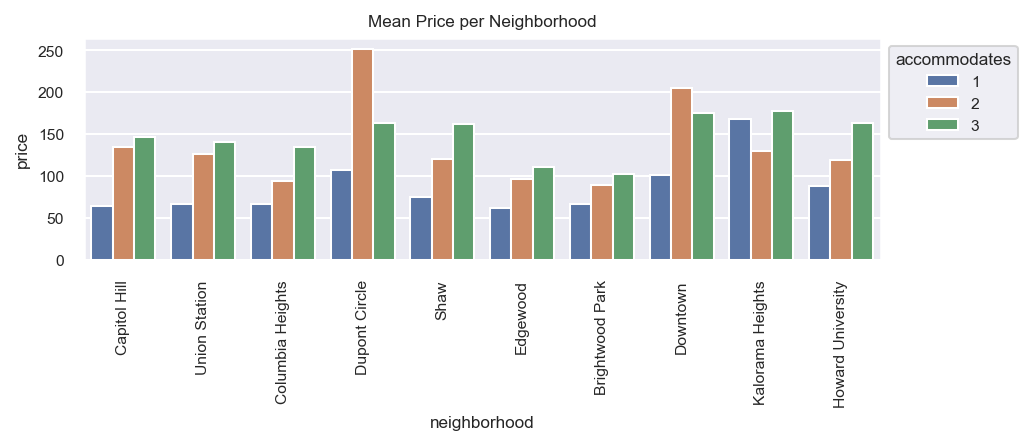

In [3]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure

### Wrapping the labels

Perhaps a better solution involves wrapping the labels at a given width. The below function uses the `textwrap` standard library to break strings at spaces at the given width, with the option to break in the middle of words.

In [4]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width, 
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

We use the function to wrap the words at or before the 10th character.

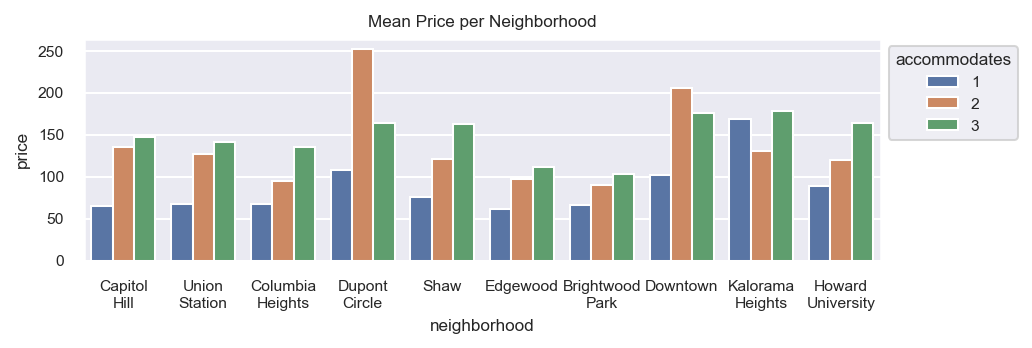

In [5]:
wrap_labels(ax, 10)
ax.figure

### Master Data Analysis with Python

If you enjoyed this tip, then check out my comprehensive book [Master Data Analysis with Python](https://www.dunderdata.com/master-data-analysis-with-python) that teaches you how to become an expert at using Python and Pandas to do data analysis.